## Tutorial notebook on how to use the CLMS Data Store and its preload_data method

### Setup
In order to run this notebook, you need to install [`xcube_clms`](https://github.com/xcube-dev/xcube-clms). You can install it following the steps below:

```bash
conda env create -f environment.yml
conda activate xcube-clms
pip install .
```

Note that [`xcube_clms`](https://github.com/xcube-dev/xcube-clms) is a plugin of [`xcube`](https://xcube.readthedocs.io/en/latest/), where `xcube` is included in the `environment.yml`.  

You also need the credentials from the Land Monitoring service. Please follows the steps outlined [`here`](https://eea.github.io/clms-api-docs/authentication.html) to download your credentials and place them in the same directory as this notebook.

In [1]:
%%time
import json

from xcube.core.store import new_data_store

CPU times: user 2.58 s, sys: 242 ms, total: 2.83 s
Wall time: 1.47 s


To get the credentials.json, please follow the steps outlined [here](https://eea.github.io/clms-api-docs/authentication.html)

In [2]:
%%time
json_file_path = "credentials.json"
with open(json_file_path, 'r') as j:
     credentials = json.loads(j.read())

CPU times: user 1.03 ms, sys: 119 μs, total: 1.15 ms
Wall time: 700 μs


When the user creates a new CLMS data store, it already sends requests to the CLMS API to get the catalog information which takes around 15-20 seconds. If no path is provided for the cache location, it will create a `clms_cache/` in the current directory to store all the downloaded data and initialize a local file store

In [3]:
%%time
clms_data_store = new_data_store("clms", credentials=credentials)

CPU times: user 168 ms, sys: 72.7 ms, total: 241 ms
Wall time: 20.3 s


The `Cache Store` within the CLMS data store is another data store which can be any user-defined data store. It defaults to the `file` store. Use `cache_id` and `cache_params` to provide information about the data store you would like to use for caching the preloaded data 

In [4]:
%%time
clms_data_store.cache_store.list_data_ids()

CPU times: user 353 μs, sys: 46 μs, total: 399 μs
Wall time: 293 μs


[]

In [5]:
%%time
clms_data_store.cache_store.root

CPU times: user 13 μs, sys: 0 ns, total: 13 μs
Wall time: 17.9 μs


'/home/yogesh/Projects/BC/xcube-clms/examples/notebooks/clms_cache'

In [6]:
%%time
clms_data_store.get_data_store_params_schema()

CPU times: user 42 μs, sys: 6 μs, total: 48 μs
Wall time: 50.8 μs


With the following commands, the users can see how the data_ids look like for the CLMS store. Due to the nature of the API, we came up with the computed data_id that combines the product_id and item_id along with the `|` separator. But as a user, you dont have to worry about how it is created, but just that you need to use the complete data_id for interacting with any of the methods of this store

In [7]:
%%time
clms_data_store.list_data_ids()

CPU times: user 2.42 ms, sys: 55 μs, total: 2.47 ms
Wall time: 2.48 ms


['clc-backbone-2021|CLMS_CLCplus_RASTER_2021',
 'clc-backbone-2018|CLMS_CLCplus_RASTER_2018_010m_eu_03035_V1_1',
 'season-maximum-value-2023-raster-300m-global-yearly-version-1|(SEASON 1) c_gls_LSP300-MAXV-S1_202301010000_GLOBE_OLCI_V1.0.1.tiff',
 'season-maximum-value-2023-raster-300m-global-yearly-version-1|(SEASON 2) c_gls_LSP300-MAXV-S2_202301010000_GLOBE_OLCI_V1.0.1.tiff',
 'slope_of_green-up-period-2023-raster-300m-global-yearly-version-1|(SEASON 1) c_gls_LSP300-LSLOPE-S1_202301010000_GLOBE_OLCI_V1.0.1.tiff',
 'slope_of_green-up-period-2023-raster-300m-global-yearly-version-1|(SEASON 2) c_gls_LSP300-LSLOPE-S2_202301010000_GLOBE_OLCI_V1.0.1.tiff',
 'slope_of_green-down-period-2023-raster-300m-global-yearly-version-1|(SEASON 1) c_gls_LSP300-RSLOPE-S1_202301010000_GLOBE_OLCI_V1.0.1.tiff',
 'slope_of_green-down-period-2023-raster-300m-global-yearly-version-1|(SEASON 2) c_gls_LSP300-RSLOPE-S2_202301010000_GLOBE_OLCI_V1.0.1.tiff',
 'start-of-season-value-2023-raster-300m-global-yearly-

In [8]:
%%time
clms_data_store.get_data_opener_ids()

CPU times: user 6 μs, sys: 0 ns, total: 6 μs
Wall time: 8.11 μs


('dataset:zarr:file',)

In [9]:
%%time
clms_data_store.get_data_types()

CPU times: user 10 μs, sys: 1e+03 ns, total: 11 μs
Wall time: 14.1 μs


('dataset',)

In [10]:
%%time
clms_data_store.get_preload_data_params_schema()

CPU times: user 29 μs, sys: 4 μs, total: 33 μs
Wall time: 35.3 μs


In [11]:
%%time
clms_data_store.has_data('forest-type-2018|FTY_2018_100m_eu_03035_v010')

CPU times: user 202 μs, sys: 0 ns, total: 202 μs
Wall time: 207 μs


True

In [12]:
%%time
dataset_to_preload = (
    'forest-type-2015|FTY_2015_100m_eu_03035_d02_Full',
    'tree-cover-density-2018|TCD_2018_100m_eu_03035_v020'
)

CPU times: user 2 μs, sys: 1 μs, total: 3 μs
Wall time: 5.25 μs


When the user runs the `preload_data` method, the user can view its status using table provided via the returned `PreloadHandle`, which indicate the status of the download request along with its progress, messages and exceptions, if any. It can be run in both blocking and non-blocking way. The user can silent the progress using the silent flag.

In [13]:
%%time
handle = clms_data_store.preload_data(
    *dataset_to_preload,
    blocking=True, # Defaults to True
    cleanup=True, # Defaults to True,
    silent=False # Defaults to False
)

CPU times: user 80.5 ms, sys: 4.8 ms, total: 85.3 ms
Wall time: 593 ms


In [14]:
%%time
handle.show()

CPU times: user 972 μs, sys: 996 μs, total: 1.97 ms
Wall time: 1.5 ms


Now that the preload is completed, the user can open the data using open_data as usual which uses the file data store underneath at the cache location

In [16]:
%%time
clms_data_store.cache_store.list_data_ids()

CPU times: user 831 μs, sys: 160 μs, total: 991 μs
Wall time: 546 μs


['tree-cover-density-2018|TCD_2018_100m_eu_03035_v020/TCD_2018_100m_eu_03035_V2_0.zarr',
 'forest-type-2015|FTY_2015_100m_eu_03035_d02_Full/FTY_2015_100m_eu_03035_d02_full.zarr']

In [17]:
clms_data_store.get_open_data_params_schema()

In [18]:
clms_data_store.get_open_data_params_schema('tree-cover-density-2018|TCD_2018_100m_eu_03035_v020/TCD_2018_100m_eu_03035_V2_0.zarr')

In [19]:
%%time
fty = clms_data_store.open_data('forest-type-2015|FTY_2015_100m_eu_03035_d02_Full/FTY_2015_100m_eu_03035_d02_full.zarr')
fty

CPU times: user 24.2 ms, sys: 5.04 ms, total: 29.2 ms
Wall time: 28.5 ms


<xarray.Dataset> Size: 24GB
Dimensions:      (y: 46000, x: 65000)
Coordinates:
    spatial_ref  int64 8B ...
  * x            (x) float64 520kB 9e+05 9.002e+05 9.002e+05 ... 7.4e+06 7.4e+06
  * y            (y) float64 368kB 5.5e+06 5.5e+06 5.5e+06 ... 9.002e+05 9e+05
Data variables:
    band_1       (y, x) float64 24GB dask.array<chunksize=(512, 512), meta=np.ndarray>
Attributes:
    source:   file:///home/yogesh/Projects/BC/xcube-clms/examples/notebooks/c...

In [20]:
%%time
tcd = clms_data_store.open_data('tree-cover-density-2018|TCD_2018_100m_eu_03035_v020/TCD_2018_100m_eu_03035_V2_0.zarr')
tcd

CPU times: user 8.52 ms, sys: 65 μs, total: 8.58 ms
Wall time: 7.6 ms


<xarray.Dataset> Size: 24GB
Dimensions:      (y: 46000, x: 65000)
Coordinates:
    spatial_ref  int64 8B ...
  * x            (x) float64 520kB 9e+05 9.002e+05 9.002e+05 ... 7.4e+06 7.4e+06
  * y            (y) float64 368kB 5.5e+06 5.5e+06 5.5e+06 ... 9.002e+05 9e+05
Data variables:
    band_1       (y, x) float64 24GB dask.array<chunksize=(512, 512), meta=np.ndarray>
Attributes:
    source:   file:///home/yogesh/Projects/BC/xcube-clms/examples/notebooks/c...

CPU times: user 22.7 s, sys: 4.37 s, total: 27.1 s
Wall time: 17 s


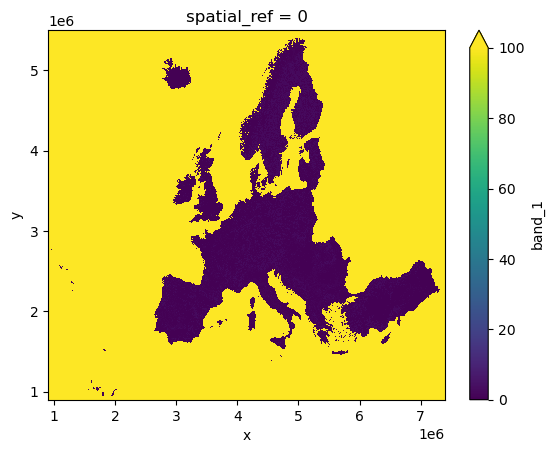

In [21]:
%%time
downsampled_cube = fty.isel(
    x=slice(None, None, 10),  
    y=slice(None, None, 10),
)
downsampled_cube.band_1.plot(vmin=0, vmax=100)

CPU times: user 21.5 s, sys: 2.66 s, total: 24.2 s
Wall time: 12.4 s


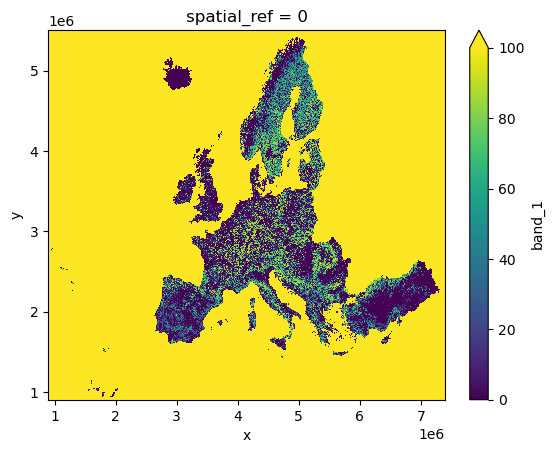

In [22]:
%%time
downsampled_cube = tcd.isel(
    x=slice(None, None, 100),  
    y=slice(None, None, 100),
)
downsampled_cube.band_1.plot(vmin=0, vmax=100)